**COMP3670/6670 Tutorial Week 7 - Regression**
---

THEORY SECTION
---

Regression and gradient descent are pillars in machine learning.  

The first part of this tutorial to go over the lecture slides in regression and gradient descent.  

**PRIORITIES:**
1. Ensure you understand **every step** of (stochastic) gradient desent.
2. Ensure you could can derive the gradient of regression problems with or without regression. 

Once that's all done, revisit the clustering section. Did you understand everything here as well? Unsupervised learning is important because it not only has immediate practical uses but is more relevant to the development of AGI (Artificial General Intelligence) than supervised (labelled) learning. If you don't understand this paragraph, please ask your tutor to clarify the meaning of supervised and unsupservised learning.

**PROGRAMMING SECTION**
---

We're going to do a simple scalar linear regression with gradient descent.


-----------

   **TASK:** 
   
   1. Randomly generate a matrix $X \in \mathbb{R}^{m \times n}$, where each row of $X$ is a training example.
   2. Choose a vector $t \in \mathbb{R}^{n \times 1}$.
   3. Generate $Y$ by $Xt = Y$.
   4. Then generate a random matrix $\theta \in \mathbb{R}^{n \times 1}$.
   5. Implement gradient descent to approximate $t$ with $\theta$.
   6. Check your gradient descent algorithm correctly approximated $t$. Talk to your classmates and tutor to make sure if you're unsure.
   7. Verify your answer with the closed form solution employing the Moore-Penrose inverse.
   
Note that in the above we're essentially pretending we don't know $t$. Obviously, if we have $t$, linear regression with gradient descent would be unnecessary, but the point is to help you understand what gradient descent is doing.

Also note: we should use the squared loss function, computed as the square of the difference between the predicted function values and the observed function values (or ground truth). 


-----------

**GENERAL COURSE HINTS:** 
- $n$ can be any number you like, but be reasonable.
- If you need extra study materials, Stanford and MIT both have some amazing freely available course content online. Look up "Machine Learning Stanford CS229" or "CS221" or "CS221N" for details.
- Wikipedia is your friend. It's not always right, but it's always there for you.

In [61]:
# YOUR CODE HERE.
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)

# Step 1 - 3: Create random variables X, t and y
m, n = 100, 3
X = np.random.randint(-10, 10, size=(m, n))  # X, M * N matrix
t = np.random.randint(-5, 5, size=n)  # t, 1 * N matrix
y = X @ t  # y, 1 * N matrix

print("True t:", t)

True t: [-1  2  1]


In [96]:
def gradient_descent(X, y, theta, max_iter=100000,
                     threshold = 1e-6, step_size = 1e-2, shuffle = True,
                     batch_gd = False,  
                     mini_batch_gd = True, batch_size = None,
                     stochastic_gd = False,
                     regularization = True, regularizer_param = 1e-1):
    
    if not regularization:
        regularizer_param = 0
        
    if batch_gd:
        batch_size = X.shape[0]
    elif stochastic_gd:
        batch_size = 1
    assert batch_size <= X.shape[0], "Unvalid batch size."
    
    losses = [np.Inf]
    
    while True:
        if len(losses) > max_iter:
            print("Stop at the max iteration.")
            break
            
        if shuffle:
            dataset = np.hstack((X, y.reshape(-1, 1)))
            np.random.shuffle(dataset)
            X = dataset[:, :-1]
            y = dataset[:, -1].reshape(-1)
        
        for i in range(0, X.shape[0] + 1, batch_size):
            X_batch = X[i:i + batch_size + 1]
            y_batch = y[i:i + batch_size + 1]
            if X_batch.shape[0] == 0:
                break
            theta = (1 - 2 * step_size * regularizer_param) * theta - step_size * (2 / X_batch.shape[0]) * (theta.T @ X_batch.T @ X_batch - y_batch.T @ X_batch)
            loss = (1 / X.shape[0]) * (y_batch - X_batch @ theta).T @ (y_batch - X_batch @ theta) + regularizer_param * (theta.T @ theta)
            losses.append(loss)
            
            if abs(losses[-1] - losses[-2]) <= threshold:
                print("Stop training at No.{} epoch, current loss is {}.".format(len(losses) - 1, loss))
                return theta, losses[1:]
                
    return theta, losses[1:]
    
    
def plot_loss(loss, title=None):
    plt.plot(range(1, len(loss) + 1), loss)
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title(title)
    plt.grid()

Stop training at No.80 epoch, current loss is 0.5964815165891533.
GD t:  [-1.00205505  1.99162501  0.99660634]


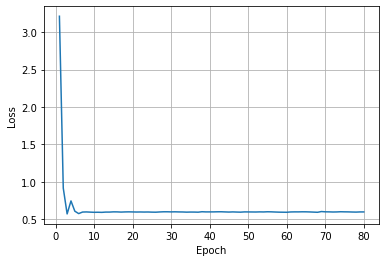

In [106]:
# Step 4: Initialize parameters theta
theta = np.random.rand(n)  # theta, 1 * N matrix
# Step 5: GD
theta_gd, loss_gd = gradient_descent(X, y, theta, max_iter=10000,
                                     threshold=1e-5, step_size=0.01, shuffle=True,
                                     mini_batch_gd=True, batch_size=3,
                                     regularization=True, regularizer_param=0.1)
print("GD t: ", theta_gd)
plot_loss(loss_gd)

In [70]:
theta_closed_form = np.linalg.inv(X.T @ X) @ X.T @ y
print("Closed form t: ", theta_closed_form)

Closed form t:  [-1.  2.  1.]


-----------
**Extended Task:** We study various influence factors in training a linear regression model in this task.

1. noise. When collecting real-world data, it is common that there would be noise included. Adding noise to your generated data and see how would this influence the parameter estimation.

2. sample amount. Sometimes it is expensive to collect data while a lot of parameters need to be trained. Let's study the effect of training example amount. That is changing the $m$ for $X \in \mathbb{R}^{m \times n}$ and compare the final loss fixing training epoch and learning rate. 

3. learning rate. How would the learning rate influence the convergence of the optimization process?

-----------
**Hint**
- You can add noise by settting $Y=Xt+\epsilon$ where $\epsilon \sim \mathcal{N}(\mu,\sigma^2)$.

In [4]:
# YOUR CODE HERE.

noise = np.random.rand(m)

y_noise = X @ t + noise

In [11]:
theta_bgd, loss_bgd = gradient_descent(X, y_noise, theta, 
                                       threshold=1e-1, step_size=0.003, 
                                       batch_gd=True, batch_size=80,
                                       regularization=True, regularizer_param=0.5)
print("GD t: ", theta_bgd)

Stop training at No.20 epoch, current loss is 26.389699138965106.
GD t:  [0.58192042 0.02058784 0.58666393]


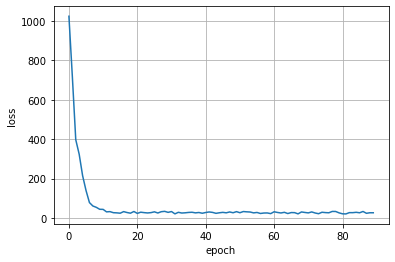

In [12]:
plot_loss(loss_bgd)